In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.core.common import SettingWithCopyWarning
import warnings
data = pd.read_csv('../data_file/fill_na_train.csv')
test_df = pd.read_csv('../data_file/fill_na_test.csv')

In [96]:
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [97]:
data['date_time'] = pd.to_datetime(data['date_time'])
data.set_index('date_time', inplace=True)

In [98]:
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

data_grouped = data.groupby('building_number').resample('H').mean()

In [99]:
data.reset_index(inplace=True)

# day by day 찾기

In [100]:
def day_by_day(number):   
    building_32 = data[data['building_number'] == number]

    # Convert the 'date_time' column to datetime
    building_32['date_time'] = pd.to_datetime(building_32['date_time'])

    # Group the data by day and calculate the minimum and maximum power consumption for each day
    daily_min_max = building_32.resample('D', on='date_time')['power_consumption'].agg(['min', 'max'])

    # Plot the minimum and maximum power consumption lines day by day
    plt.figure(figsize=(15, 8))
    plt.plot(daily_min_max['min'], label='Daily Minimum')
    plt.plot(daily_min_max['max'], label='Daily Maximum')
    plt.xlabel('Date')
    plt.ylabel('Power Consumption')
    plt.title('Daily Min and Max Power Consumption for Building No. 32')
    plt.legend()
    plt.show()

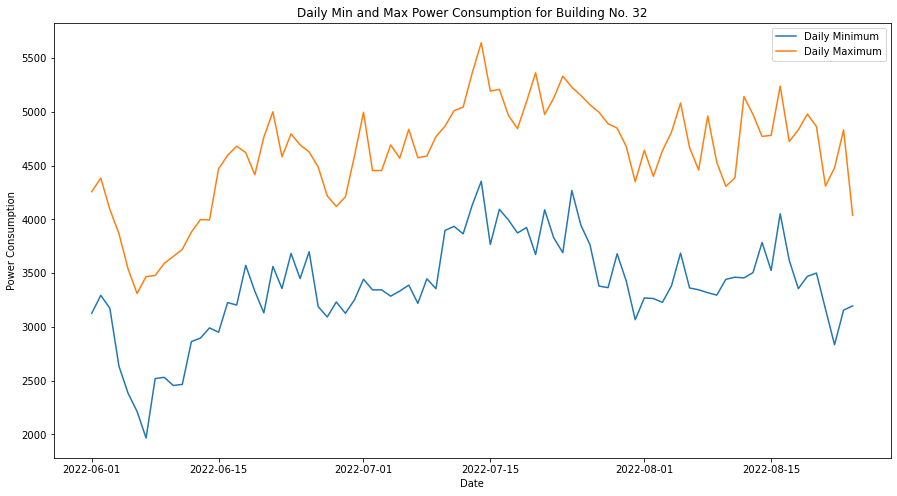

In [101]:
day_by_day(10)

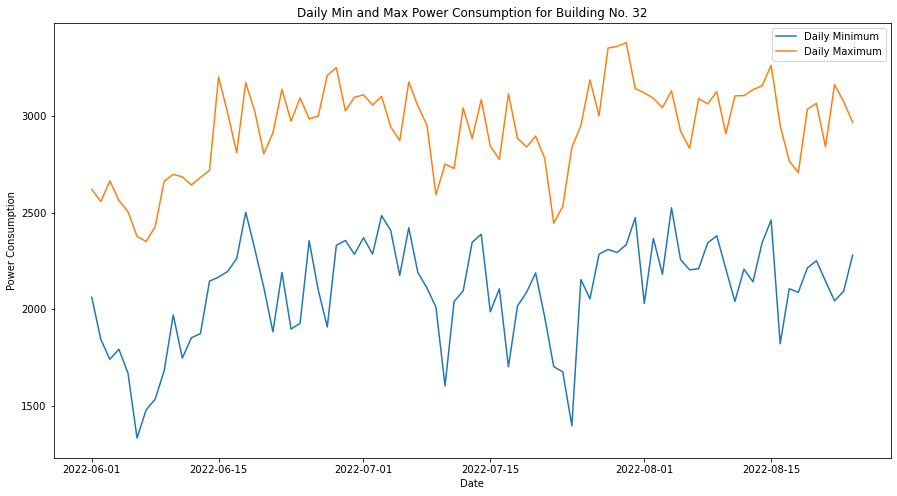

In [102]:
day_by_day(13)

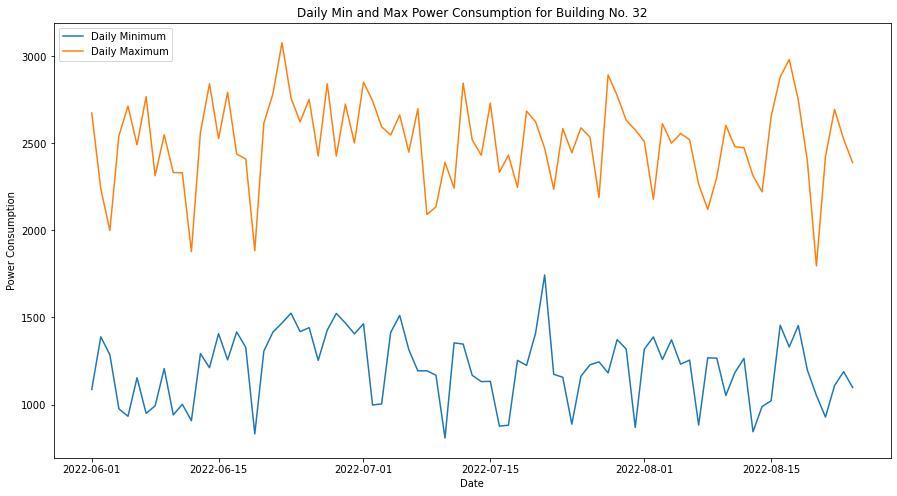

In [103]:
day_by_day(14)

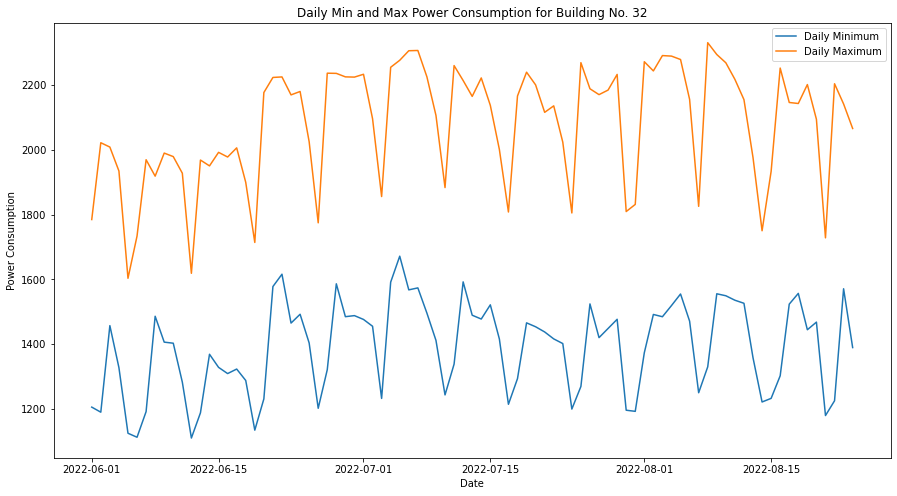

In [104]:
day_by_day(15)

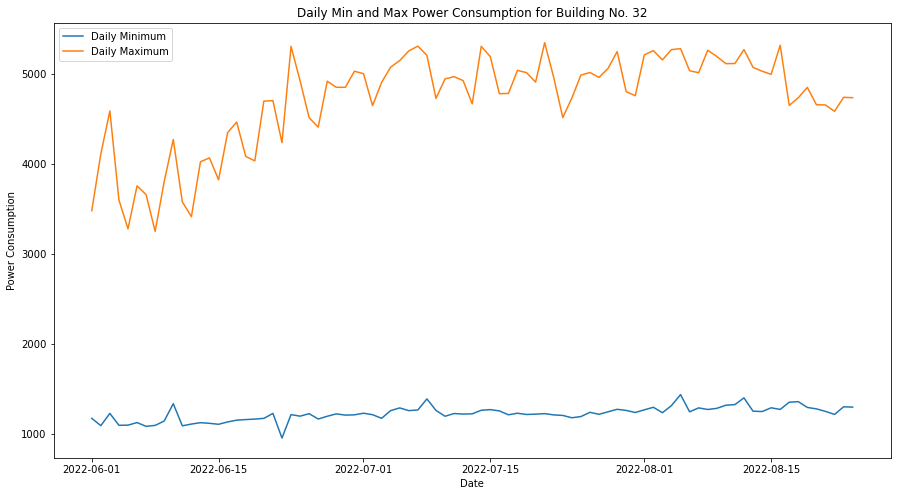

In [105]:
day_by_day(16)

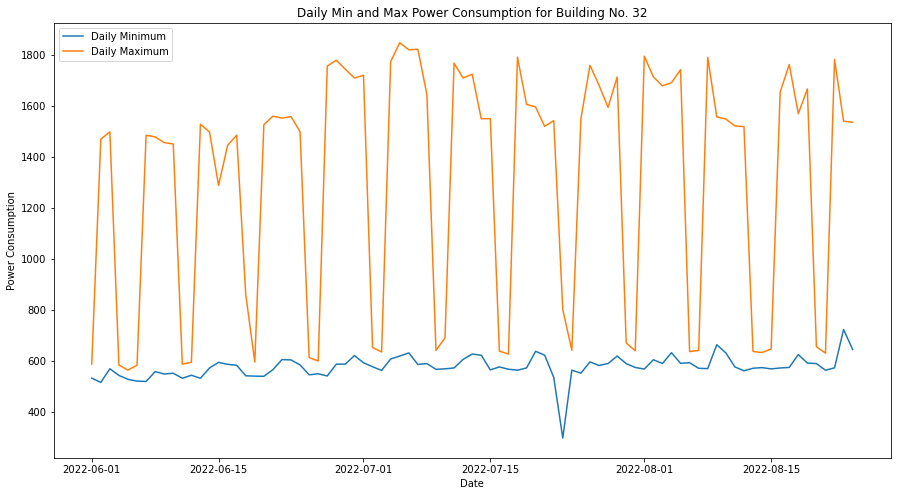

In [106]:
day_by_day(17)

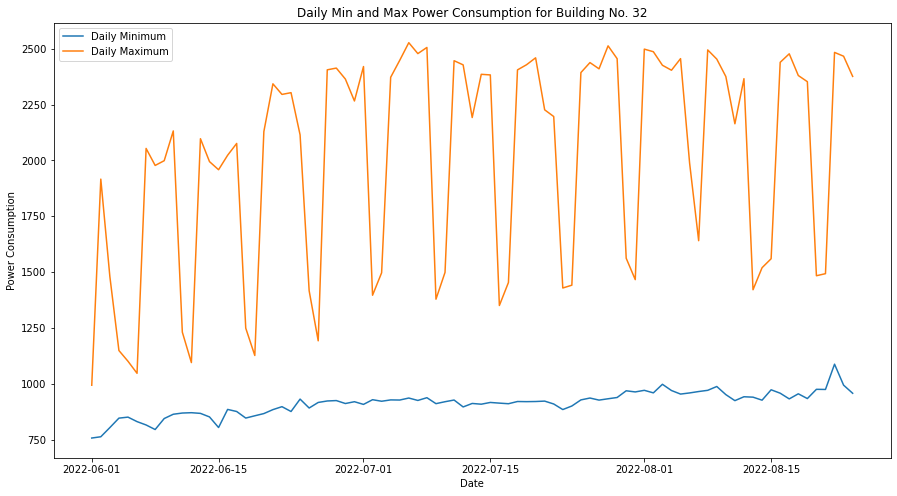

In [107]:
day_by_day(18)

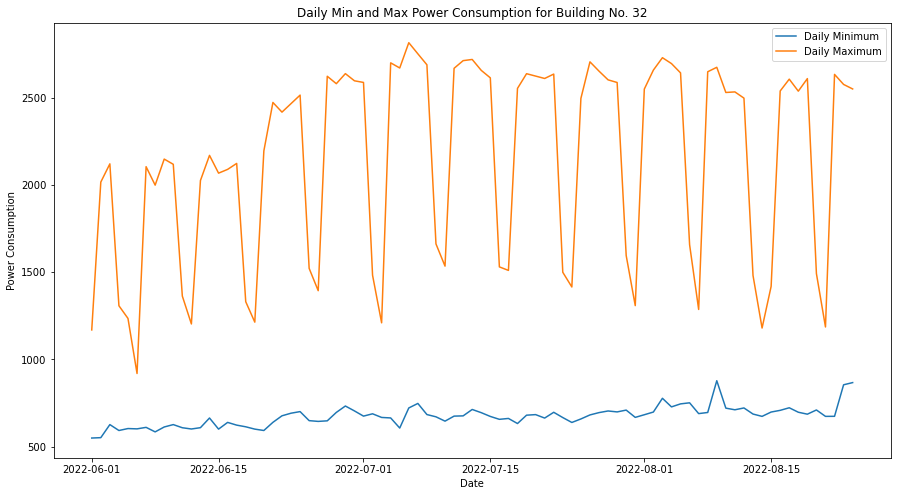

In [108]:
day_by_day(19)

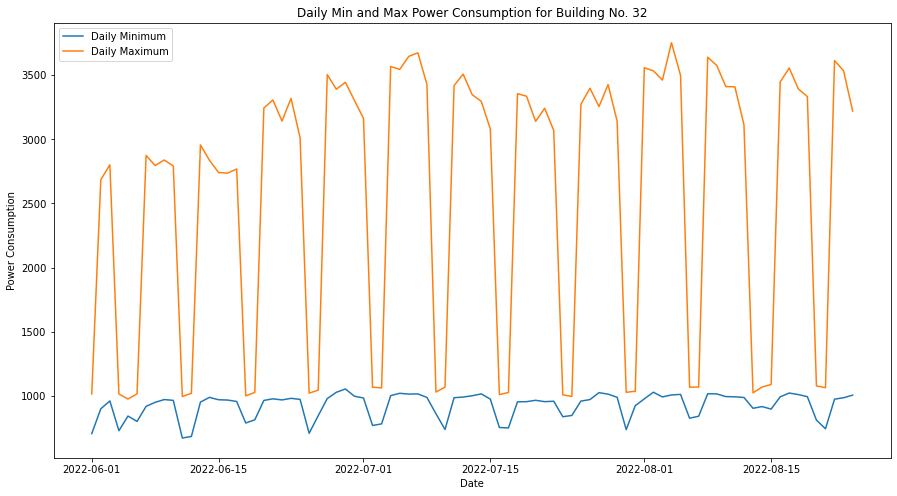

In [109]:
day_by_day(20)

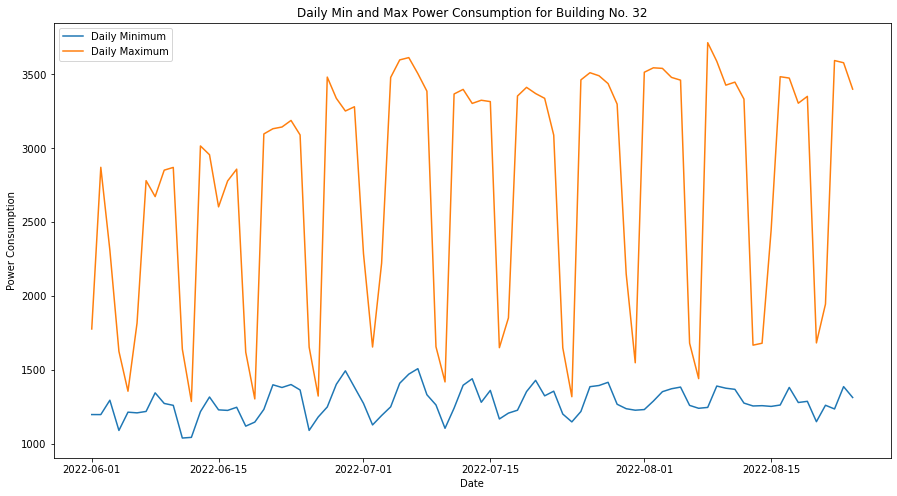

In [110]:
day_by_day(21)

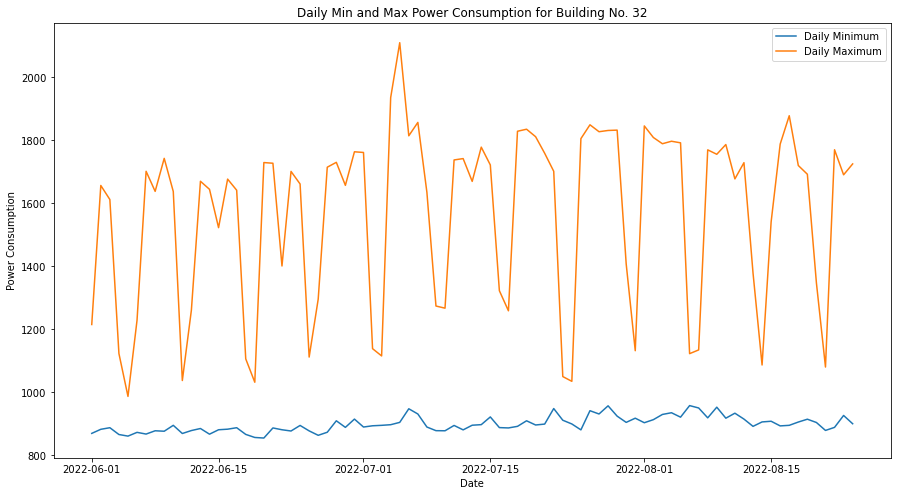

In [111]:
day_by_day(22)

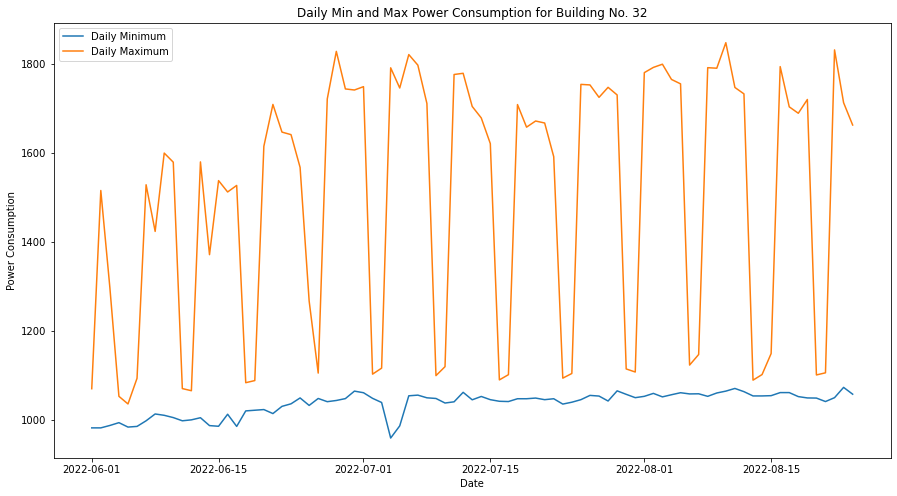

In [112]:
day_by_day(23)

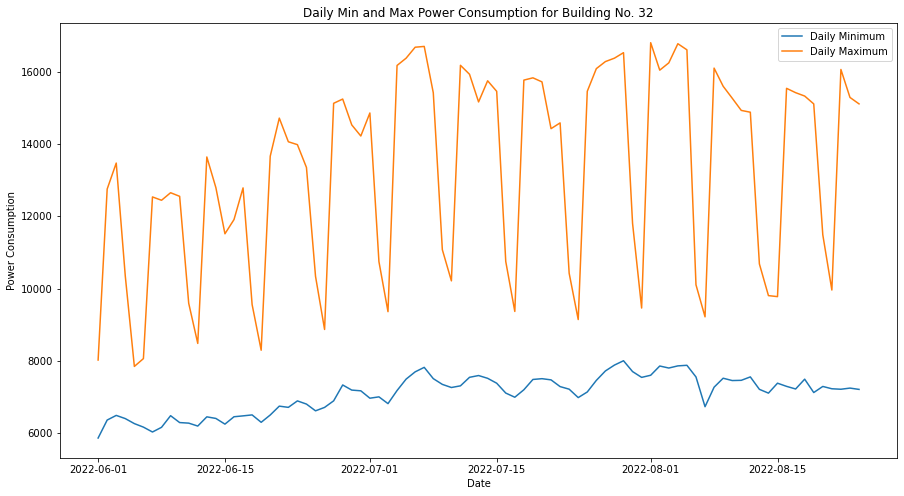

In [113]:
day_by_day(24)

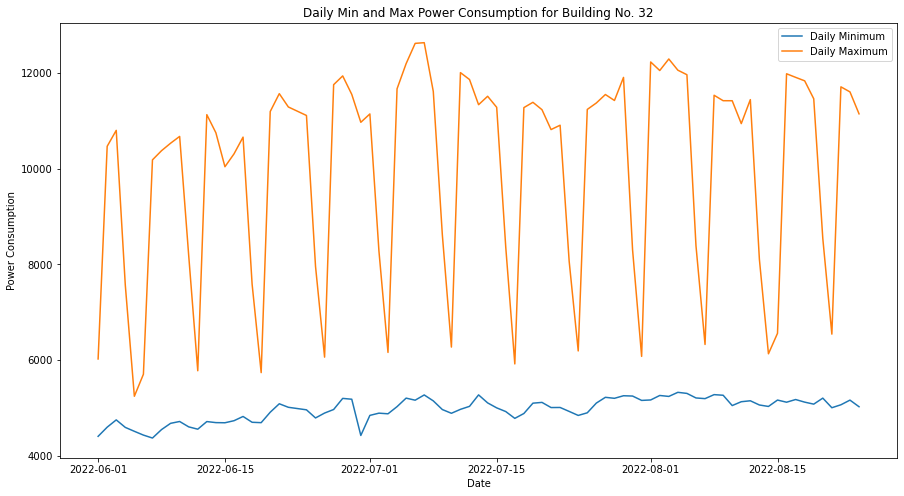

In [114]:
day_by_day(25)

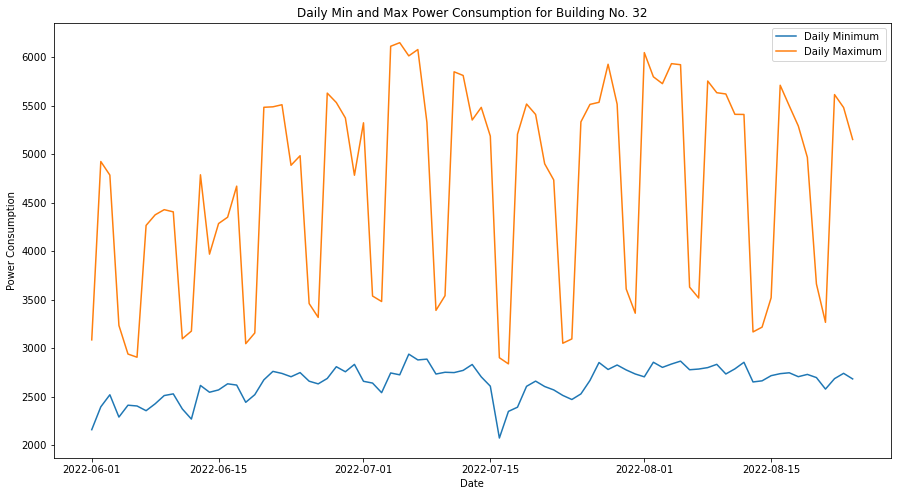

In [115]:
day_by_day(26)

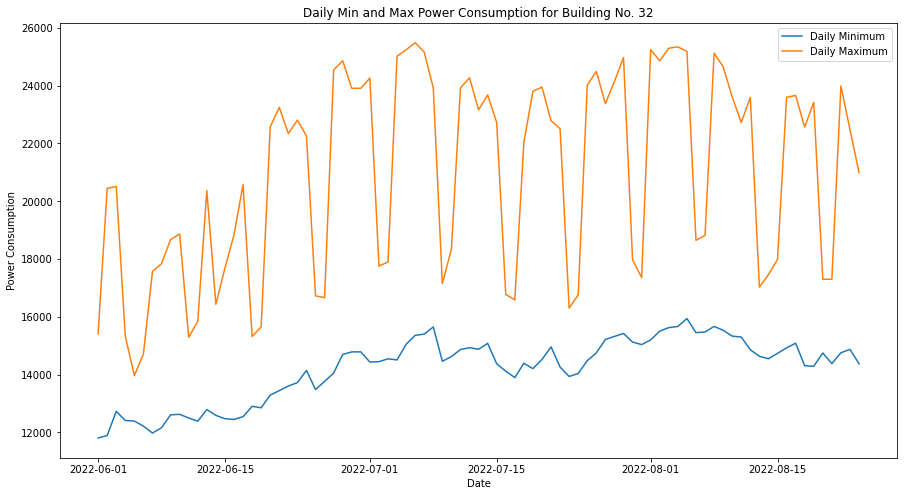

In [116]:
day_by_day(27)

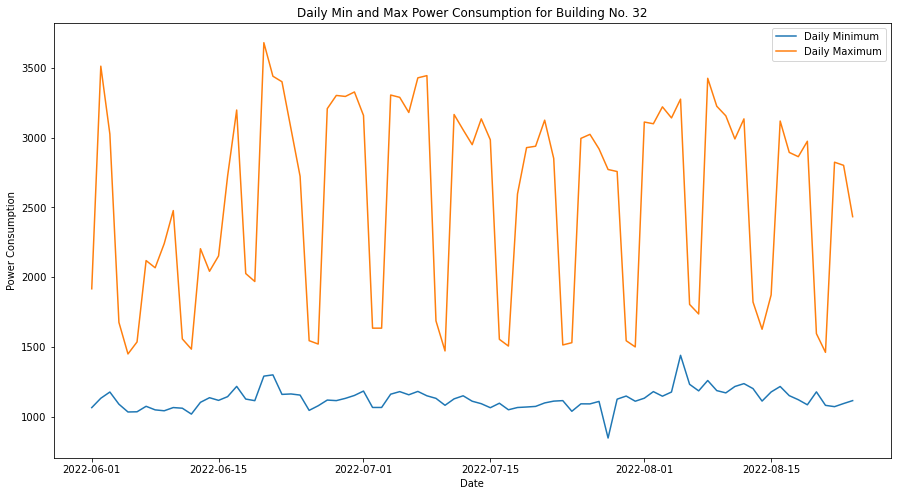

In [117]:
day_by_day(28)

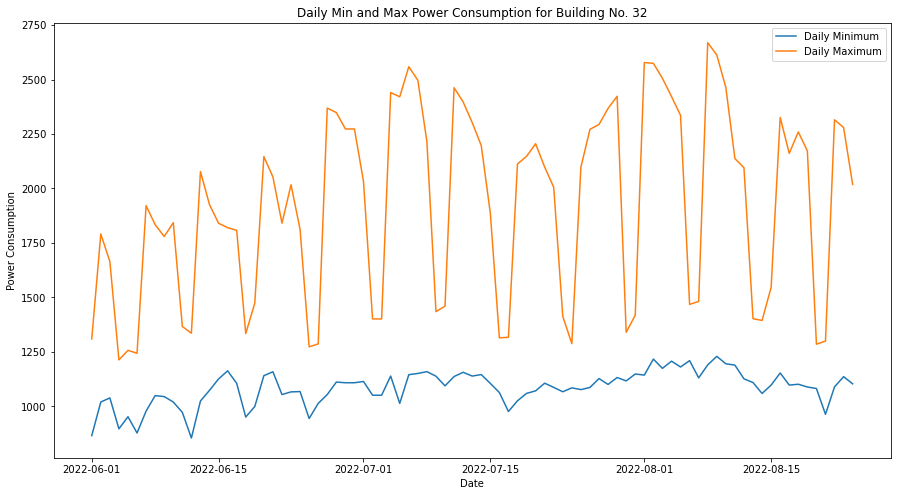

In [118]:
day_by_day(29)

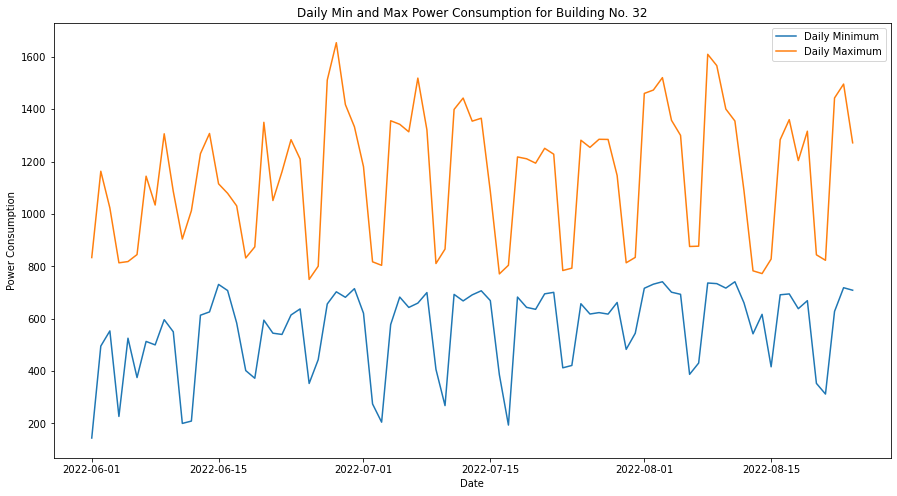

In [119]:
day_by_day(30)

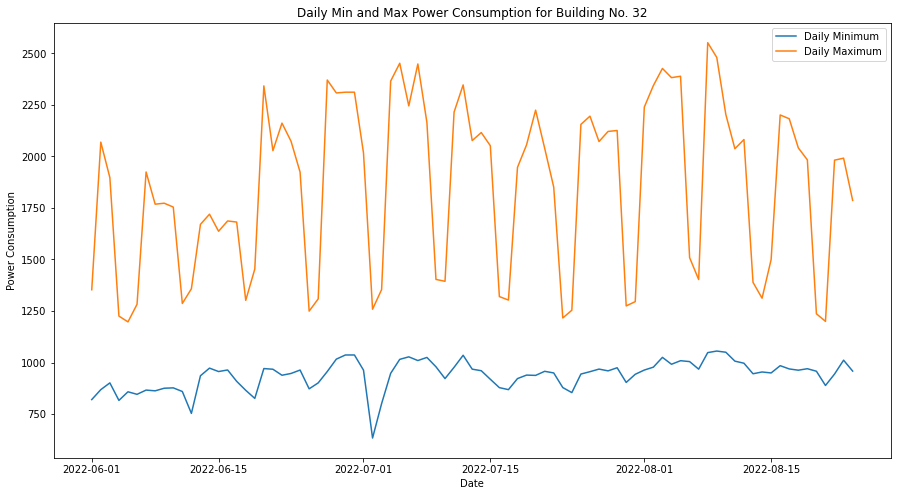

In [120]:
day_by_day(31)

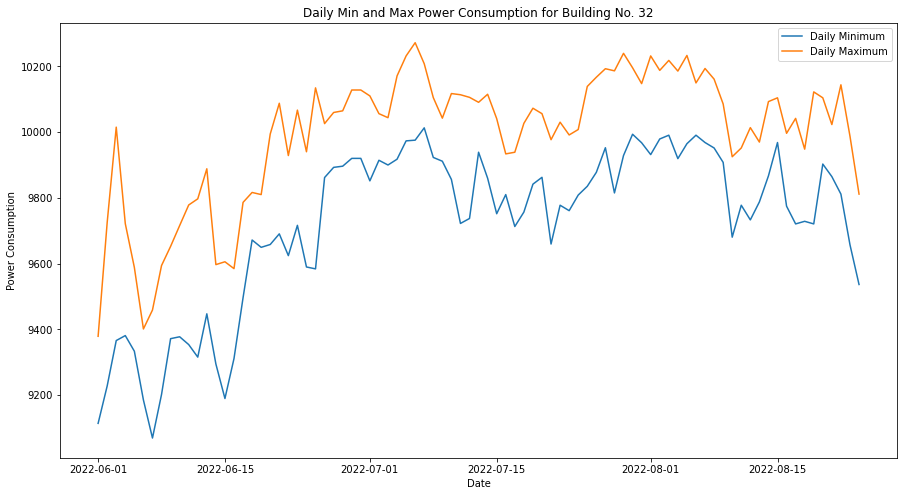

In [121]:
day_by_day(32)

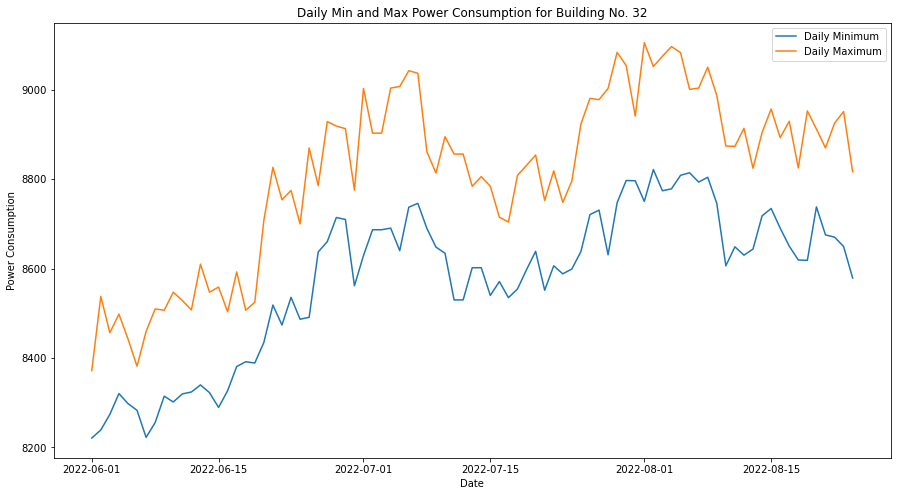

In [122]:
day_by_day(33)

In [57]:
def plot_day_by_day(number, data):
    building_2_data = data[data['building_number'] == number]

    # Resample data on a daily basis and calculate the total power consumption for each day
    daily_data_2 = building_2_data.resample('D', on='date_time')['power_consumption'].sum()

    # Calculate the rate of change in daily power consumption
    daily_data_2_change = daily_data_2.diff()

    # Calculate the threshold for severe changes
    threshold_2 = daily_data_2_change.std() * 0.9

    # Find the dates where the absolute change is greater than the threshold
    severe_change_dates_2 = daily_data_2_change[daily_data_2_change < -threshold_2].index

    # Plot daily power consumption
    plt.figure(figsize=(15,7))
    plt.plot(daily_data_2.index, daily_data_2.values, label='Daily Power Consumption')

    # Highlight the points where severe changes occurred
    for date in severe_change_dates_2:
        plt.axvline(x=date, color='r', linestyle='--', alpha=0.5)

    plt.title('Daily Power Consumption of Building 2 Over Time (Severe Changes Highlighted)')
    plt.xlabel('Date')
    plt.ylabel('Daily Power Consumption')
    plt.legend()
    plt.grid(True)
    plt.show()

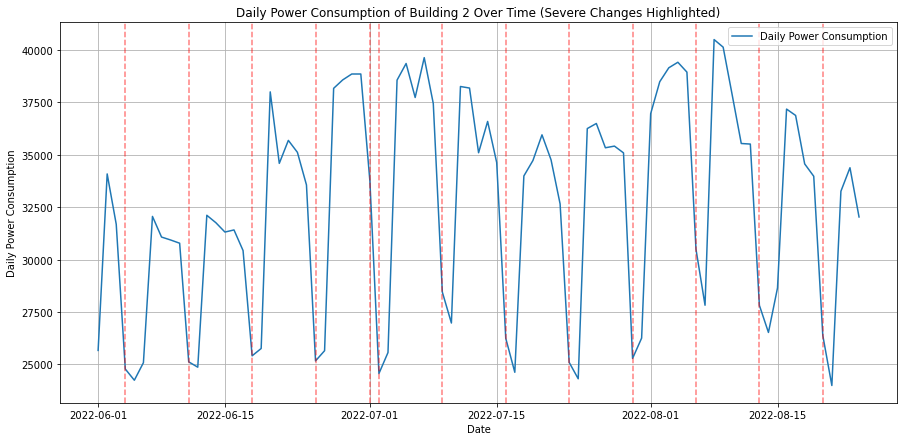

In [91]:
plot_day_by_day(31, train_df)

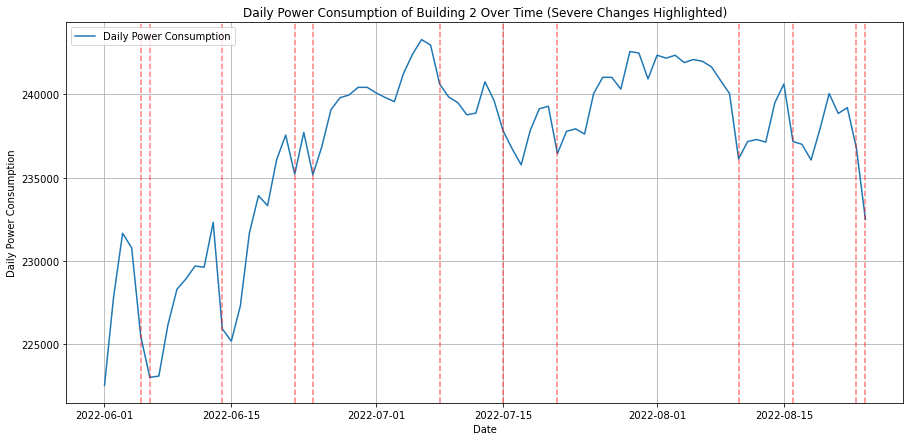

In [92]:
plot_day_by_day(32, train_df)

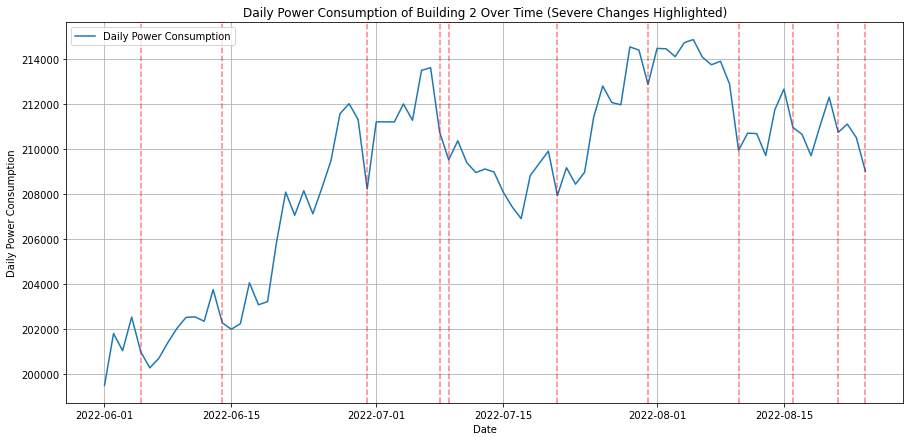

In [93]:
plot_day_by_day(33, train_df)

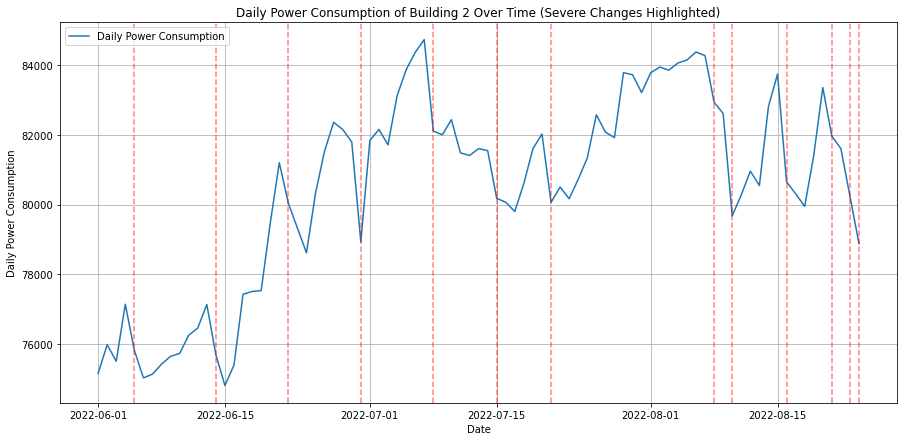

In [94]:
plot_day_by_day(34, train_df)